In [1]:
import sys
sys.path.append('/home/kfuruglyas/Documents/popularity_versus_similarity/')

In [2]:
import networkx as nx

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pvs import network_creation as nc

from tqdm.notebook import tqdm
from scipy.optimize import curve_fit

In [ ]:
Nodes = nc.Nodes(n = 4039, m = 22, beta = 0.7,T = 7.55)

Adding nodes:   2%|▏         | 93/4039 [00:00<00:04, 924.50it/s]

2 22
3 22
4 22
5 22
6 22
7 22
8 22
9 22
10 22
11 22
12 22
13 22
14 22
15 22
16 22
17 22
18 22
19 22
20 22
21 22
22 22


Adding nodes:  69%|██████▉   | 2779/4039 [00:52<00:47, 26.58it/s]

In [17]:
nodes = Nodes.nodes

In [18]:
for n in nodes.keys():
    if 4039 in nodes[n]["conns"]:
        print(n)

61
486
581
678
790
815
898
939
1115
1551
1627
1665
2339
2679
2694
2746
2924
3306
3508
3607
3806
3970


In [19]:
nodes[4039]

{'conns': [61,
  3508,
  898,
  815,
  1627,
  3306,
  2679,
  1551,
  2694,
  1115,
  581,
  3806,
  486,
  1665,
  3970,
  939,
  678,
  3607,
  2746,
  2924,
  790,
  2339],
 'theta': 310.4163680439218,
 'pos': 5.944103170173736}

In [20]:
G = Nodes.to_networkx()

In [21]:
nx.average_clustering(G)

0.6455690145485397

In [10]:
G.number_of_edges(u = 1,)

KeyError: 1

In [11]:
df = Nodes.nodes_df

In [12]:
df['num_of_edges'] = [len(r["conns"]) for i, r in df.iterrows()]

In [13]:
df

,conns,theta,pos,num_of_edges
2,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",240.711537,0.540212,426
3,"[2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",154.961732,0.702398,358
4,"[2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",350.225959,0.817471,241
5,"[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",354.969024,0.906728,219
6,"[2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",34.942153,0.979657,249
...,...,...,...,...
4036,"[3223, 1908, 2822, 3340, 443, 2388, 653, 3237,...",271.585318,3.584157,22
4037,"[3743, 637, 3271, 1916, 324, 3396, 1549, 196, ...",343.234787,3.584256,22
4038,"[719, 3341, 314, 1217, 2184, 731, 490, 585, 23...",44.087238,3.584355,22
4039,"[427, 2032, 2980, 2376, 912, 3624, 3441, 2522,...",7.473085,3.584454,22


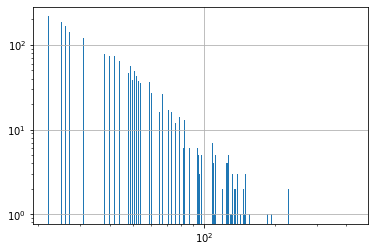

In [15]:
fig, ax = plt.subplots(1,1, facecolor = 'white')

bins = np.logspace(np.log10(df.num_of_edges.min()),np.log10(df.num_of_edges.max()), 1000)

df.num_of_edges.hist(bins = bins, ax = ax)

ax.set_yscale('log')
ax.set_xscale('log')

In [105]:
G_fb = nx.read_edgelist("facebook_combined.txt")

In [37]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88605
Average degree:  43.8747


In [9]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [10]:
print(nx.average_clustering(G))
print(nx.average_clustering(G_fb))

0.6064805291595774
0.6055467186200876


In [30]:
print(nx.average_shortest_path_length(G))
print(nx.average_shortest_path_length(G_fb))

3.4041571645255195
3.6925068496963913


In [115]:
def power_law(x, gamma, c):
    return c*x**(-gamma)

In [174]:
bins = range(df.num_of_edges.min(),df.num_of_edges.max())

ydata, xdata = np.histogram(df.num_of_edges, bins = bins)
xdata = xdata[:-1]

datas = [(x,y) for x,y in zip(xdata, ydata) if y !=0]
xdata, ydata = np.array([i[0] for i in datas]), np.array([i[1] for i in datas])

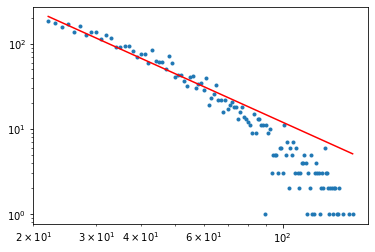

In [175]:

popt, pcov = curve_fit(power_law, xdata, ydata)

plt.plot(xdata, ydata, "." )

plt.plot(xdata, power_law(xdata, *popt), 'r-', )
plt.xscale('log')
plt.yscale('log')


In [176]:
popt

array([1.88961202e+00, 7.20532797e+04])

In [177]:
degrees = np.array(list(dict(G_fb.degree()).values()))

In [178]:
degrees

array([347,  17,  10, ...,   2,   4,   9])

In [179]:
bins = range(degrees.min(),degrees.max())

ydata, xdata = np.histogram(degrees, bins = bins)
xdata = xdata[:-1]

datas = [(x,y) for x,y in zip(xdata, ydata) if y !=0 and x]
xdata, ydata = np.array([i[0] for i in datas]), np.array([i[1] for i in datas])

<ipython-input-115-dfc6b626ea1f>:2: RuntimeWarning: overflow encountered in power
  return c*x**(-gamma)


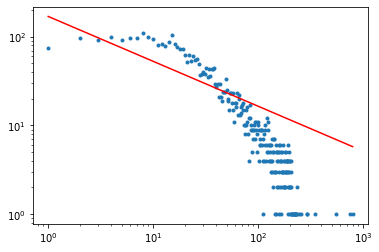

In [180]:

popt, pcov = curve_fit(power_law, xdata, ydata)

plt.plot(xdata, ydata, "." )

plt.plot(xdata, power_law(xdata, *popt), 'r-', )
plt.xscale('log')
plt.yscale('log')


In [181]:
popt

array([  0.50655165, 169.64780068])